# NonLinear Data Transformation
### Power Transformer:
        1:BoxCox
        2:YeoJohnsn
### 3:QuantileTransformer

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Generate exponential data

In [2]:
np.random.seed(0)
df=np.random.exponential(size=1000,scale=2)
df=pd.DataFrame(df,columns=['Values'])
df

,Values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


In [3]:
df.shape

(1000, 1)

# Plot the histogram of original data

<Axes: xlabel='Values', ylabel='Count'>

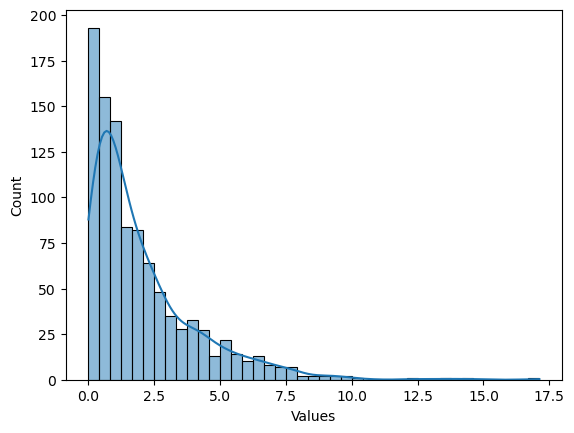

In [4]:
sns.histplot(df['Values'],kde=True)

# Data must be positive for box-cox

In [5]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# Apply power transformations

In [10]:
# Apply power transformations
BOX_COX = PowerTransformer(method='box-cox',standardize=False)
YEO_Johnson = PowerTransformer(method='yeo-johnson')
quntile=QuantileTransformer(output_distribution='normal')

In [11]:
df['Box_Cox']= BOX_COX.fit_transform(df[['Values']]+1)
df['Yeo_Johnson']= YEO_Johnson.fit_transform(df[['Values']])
df['quntile']= quntile.fit_transform(df[['Values']])
df.head()

,Values,Box_Cox,Yeo_Johnson,quntile
0,1.591749,0.787485,0.179335,0.162552
1,2.511862,0.980233,0.677331,0.587964
2,1.846446,0.849553,0.339698,0.286135
3,1.574402,0.782945,0.167607,0.157469
4,1.102097,0.639848,-0.202107,-0.154930


# Plot histograms after power transformations

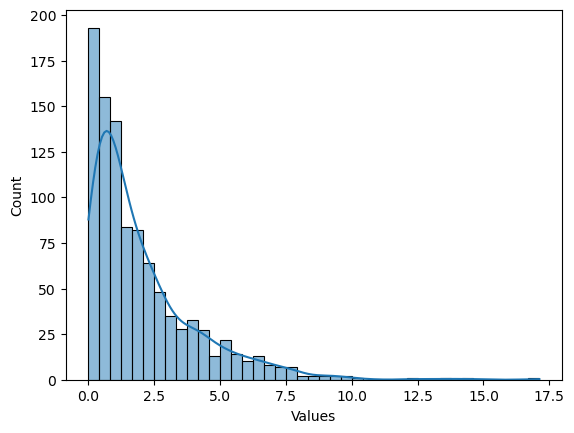

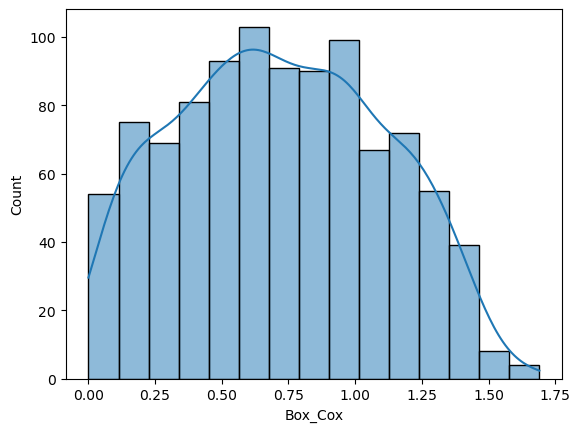

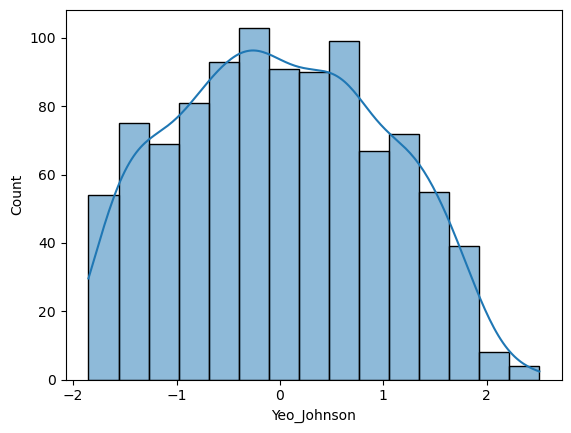

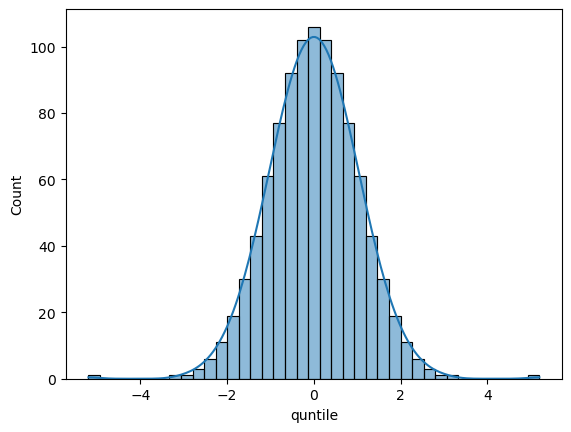

In [12]:
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()